In [31]:
library(ggplot2)

In [23]:
matern_cov = function(s, t, nu, rho=1, sigma=1){
    d = abs(t-s)
    
    # to avoid Infinity or Missing Values in Covariance Matrix
    if(d==0){
        return(sigma**2)
    }
    
    a = sqrt(2*nu) * d / rho
    cov = (sigma**2) / (gamma(nu) * (2**(nu-1))) * (a**nu) * besselK(a, nu)
    
    return(cov)
}

In [26]:
n = 100
x = seq(0, 10, length.out=n)

# initiate covariance matrix 
C1 = matrix(nrow=n, ncol=n)
C2 = matrix(nrow=n, ncol=n)
C3 = matrix(nrow=n, ncol=n)

for(i in 1:n){
  for(j in 1:n){
    C1[i, j] <- matern_cov(x[i], x[j], nu=0.5)
  }
}

for(i in 1:n){
  for(j in 1:n){
    C2[i, j] <- matern_cov(x[i], x[j], nu=2)
  }
}

for(i in 1:n){
  for(j in 1:n){
    C3[i, j] <- matern_cov(x[i], x[j], nu=4)
  }
}

In [51]:
library(MASS)
set.seed(123)
y1 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C1)

set.seed(123)
y2 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C2)

set.seed(123)
y3 <- mvrnorm(n=1, mu=rep(0,n), Sigma=C3)

d1 = data.frame(x,y1)
d2 = data.frame(x,y2)
d3 = data.frame(x,y3)

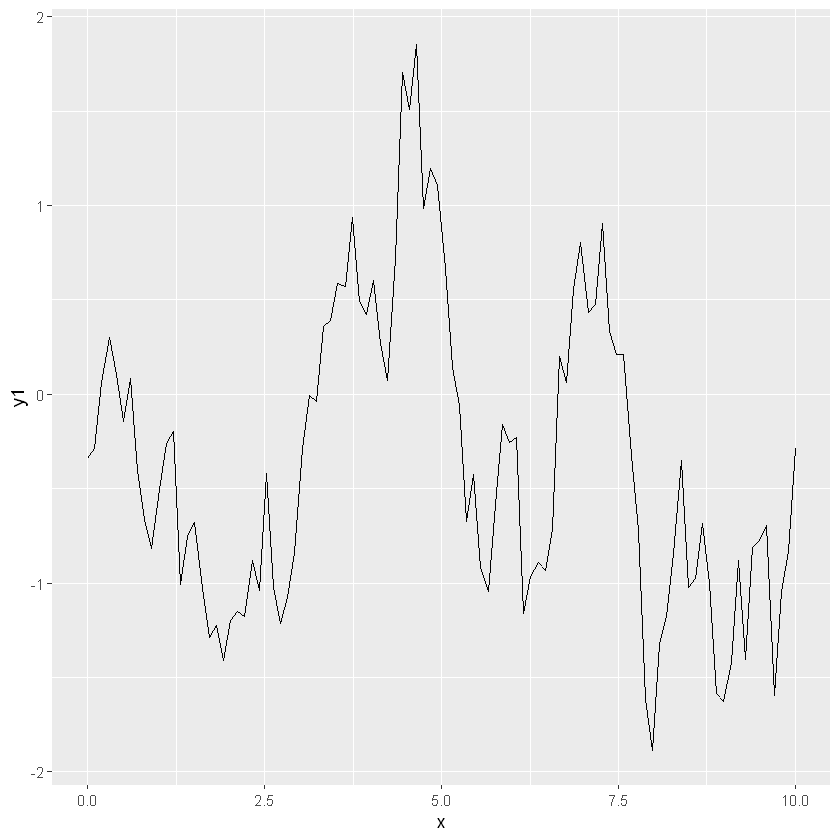

In [52]:
ggplot(d1, aes(x=x, y=y1)) + 
    geom_line()

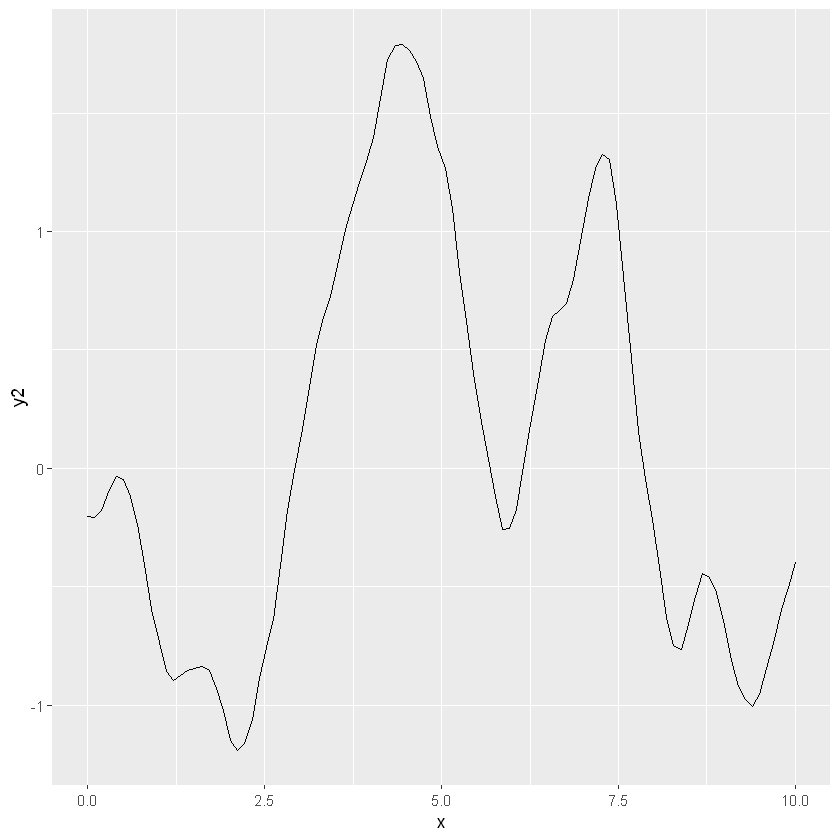

In [53]:
ggplot(d2, aes(x=x, y=y2)) + 
    geom_line()

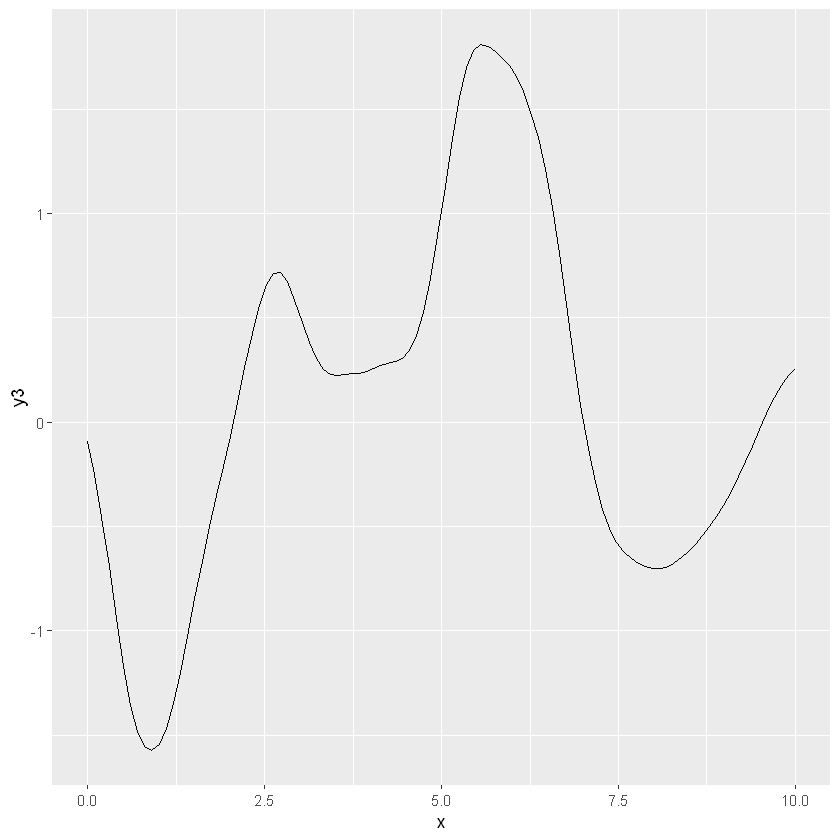

In [54]:
ggplot(d3, aes(x=x, y=y3)) + 
    geom_line()